# COGS 108 - Final Project 

# Overview

My project aims to investigate the relationship between the income level of an area and the number of violations reported in that area. I use three datasets includes restaurants, zipcodes and violations. Firstly I clean the dataset so that they can be used easily. I combine the three datasets to calculate the average of the sum of violations in each restaurant in a zipcode area. Then I analyze the relationship between the average number of violations and four different factors that can represent some perspective of the income level in a zipcode area. After analyzing the relationships between these five properties, I find that based on the dataset I used there is generally no relation between income level of an area and the number of violations being reported in that area.

# Name & GitHub

- Name: Yiran Shao
- GitHub Username: irenesyr

# Research Question

Is the income level of an area related to the number of health inspection vioations being reported in the area?

## Background and Prior Work

Income level of an area can influence the type of restaurants in the are, vice versa. The percentage of different types of restaurants is related to the income level around an area. According to reference 1, people living around nonchain restaurants have lower median household income. Therefore an area with higher income level may have more chain restaurants than nonchain restaurants. According to reference 1, chain restaurants have much fewer violations than nonchain restaurants. So there can be a relation between the income level and number of violations reported in an area.

According to reference 2, which investigates "Household income differences in food sources and food items purchased", people with higher income spend much more on eating out than people with lower income. Also, people with lower income spend a larger proportion of their income at carry out places than people with higher income. Therefore there is a relation between dining places and income level. There is also a relation between income level and the total amount of income spending in restaurants.

According to reference 3, both of the amount of money spending on food away from home and the percentage of money spending on food away from home increases as the income level increases. People with higher income tend to spend more in restaurants, so they may go to restaurants often or go to more expensive restaurants.

References (include links):
- 1)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/
- 2)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2988056/
- 3)http://jaysonlusk.com/blog/2017/9/20/how-food-spending-varies-with-income

# Hypothesis


The income level of people in an area is related to the number of violations being reported in this area. The number of violations in restaurants should increase as the income level decreases.

# Dataset(s)

1.
- Dataset Name: restaurants
- Link to the dataset: 
- Number of observations: 3000

The 'restaurant' dataset contains the information related to the restaurants. Each row corresponds to a restaurant with unique id and there are information of 3000 restaurants in total.

2.
- Dataset Name: zipcodes
- Link to the dataset: 
- Number of observations: 38

The 'zipcodes' dataset contains the information about income and people in an area with particular zipcodes. Each row contains the data for one zipcode and there are 38 different zipcodes and their data in this dataset.

3.
- Dataset Name: violations
- Link to the dataset: 
- Number of observations: 3000

The restaurant dataset contains the information related to the restaurants. Each row corresponds to a restaurant with unique id and there are information of 3000 restaurants in total.

I will use these three datasets for my project. I want to investigate if there is a relations between the average number of violations of restaurants in an area and the income level in that area. I will combine the datasets by combining zipcode information in restaurants dataset with the violation information in violations dataset by matching the restautants' hsisids. Then I will combine the violations dataset with the zipcodes dataset by matching the restaurants' zipcodes.

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [2]:
re_df = pd.read_csv('restaurants.csv')
zc_df = pd.read_csv('zipcodes.csv')
vl_df = pd.read_csv('violations.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
re_df.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [4]:
zc_df.head()

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


In [5]:
vl_df.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


# Clean restaurants dataset re_df

In [6]:
print('delete useless columns')
print('re_df has columns:',re_df.columns)
re_df = re_df[['hsisid','name', 'postalcode']]
print('re_df has columns:',re_df.columns)

print('drop null values')
print('check null value\n', re_df.isnull().sum())
re_df = re_df.dropna()
print('check null value\n', re_df.isnull().sum())

print('regulate the postalcodes')
def cutCode(postalcode):
    postalcode = int(str(postalcode)[:5])
    return postalcode
re_df['postalcode'] = re_df['postalcode'].apply(cutCode)

print('vl_df shape is:', re_df.shape)
re_df.head()

delete useless columns
re_df has columns: Index(['X.objectid', 'hsisid', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'],
      dtype='object')
re_df has columns: Index(['hsisid', 'name', 'postalcode'], dtype='object')
drop null values
check null value
 hsisid        0
name          0
postalcode    0
dtype: int64
check null value
 hsisid        0
name          0
postalcode    0
dtype: int64
regulate the postalcodes
vl_df shape is: (3324, 3)


,hsisid,name,postalcode
0,4092017230,SPRING CAFE 2,27616
1,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),27502
2,4092014444,Taco Bell #22798,27587
3,4092015333,THE REMEDY DINER,27601
4,4092160069,ZEBULON HOUSE (KITCHEN),27597


# Clean violations dataset vl_df

In [7]:
print('delete useless columns')
print('vl_df has columns:',vl_df.columns)
vl_df = vl_df[['hsisid', 'critical']]
print('re_df has columns:',re_df.columns)

print('drop null values')
print('check null value\n', vl_df.isnull().sum())
vl_df = vl_df.dropna()
print('check null value\n', vl_df.isnull().sum())

print('change critical column to integer')
def convertCritical(critical):
    if critical == 'Yes':
        critical = 2
    elif critical == 'No':
        critical = 1
    else:
        return 0
    return critical
vl_df['critical'] = vl_df['critical'].apply(convertCritical)

print('vl_df shape is:', vl_df.shape)
vl_df.head()

delete useless columns
vl_df has columns: Index(['X.objectid', 'hsisid', 'inspectdate', 'category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'],
      dtype='object')
re_df has columns: Index(['hsisid', 'name', 'postalcode'], dtype='object')
drop null values
check null value
 hsisid         0
critical    8957
dtype: int64
check null value
 hsisid      0
critical    0
dtype: int64
change critical column to integer
vl_df shape is: (180845, 2)


,hsisid,critical
0,4092015279,2
1,4092014572,2
2,4092015906,2
3,4092013840,2
4,4092021788,2


# Clean zipcodes dataset zc_df

In [8]:
print('delete useless columns')
print('zc_df has columns:',vl_df.columns)
zc_df = zc_df[['zip','median_family_income_dollars','median_household_income_dollars', 'per_capita_income_dollars', 'percent_damilies_below_poverty_line']]
print('zc_df has columns:',re_df.columns)

zc_df.rename(columns={'percent_damilies_below_poverty_line': 'percent_families_below_poverty_line'}, inplace=True)

print('drop null values')
print('check null value\n', vl_df.isnull().sum())
zc_df = zc_df.dropna()
print('check null value\n', zc_df.isnull().sum())

print('zc_df shape is:', zc_df.shape)
zc_df.head()

delete useless columns
zc_df has columns: Index(['hsisid', 'critical'], dtype='object')
zc_df has columns: Index(['hsisid', 'name', 'postalcode'], dtype='object')
drop null values
check null value
 hsisid      0
critical    0
dtype: int64
check null value
 zip                                    0
median_family_income_dollars           0
median_household_income_dollars        0
per_capita_income_dollars              0
percent_families_below_poverty_line    0
dtype: int64
zc_df shape is: (38, 5)


,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line
0,27501,59408,51121,21631,10.5
1,27502,109891,95857,36763,3.4
2,27511,82292,67392,33139,9.6
3,27513,109736,87262,41232,3.8
4,27518,125432,98247,49865,5.5


# Combine vl_df and rs_df and zc_df

In [9]:
#calculate the sum of violations in each resraurant
sum_re = vl_df.groupby(['hsisid']).sum()
print('sum_re shape is: ',sum_re.shape)
sum_re.head()

sum_re shape is:  (4266, 1)


,critical
hsisid,
4092010018,138
4092010024,92
4092010031,28
4092010035,52
4092010037,53


In [10]:
#merge violation dataset and restaurant dataset
df = pd.merge(sum_re, re_df, on = 'hsisid')
print('df shape is: ', df.shape)
df.head()

df shape is:  (3197, 4)


,hsisid,critical,name,postalcode
0,4092010018,138,Angus Barn,27628
1,4092010024,92,Applebee`s,27607
2,4092010031,28,Archdale Bldg. Snack Bar,27604
3,4092010035,52,Ashworth Rexall Drug,27511
4,4092010037,53,Aubrey & Peedi`s Grill,27591


In [11]:
df = df[['critical', 'postalcode']]
df.rename(columns={'postalcode': 'zip'}, inplace=True)
df1 = df.groupby(['zip']).mean()
print("df1 shape is: ", df1.shape)
df1.head()

df1 shape is:  (55, 1)


,critical
zip,
27263,8.000000
27501,96.000000
27502,62.073171
27511,76.483721
27512,73.333333


In [12]:
df2 = pd.merge(df1, zc_df, on = 'zip')
print('df2 shap is: ', df2.shape)
df2.head()

df2 shap is:  (37, 6)


,zip,critical,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line
0,27501,96.000000,59408,51121,21631,10.5
1,27502,62.073171,109891,95857,36763,3.4
2,27511,76.483721,82292,67392,33139,9.6
3,27513,91.409722,109736,87262,41232,3.8
4,27518,45.733333,125432,98247,49865,5.5


# Data visualization

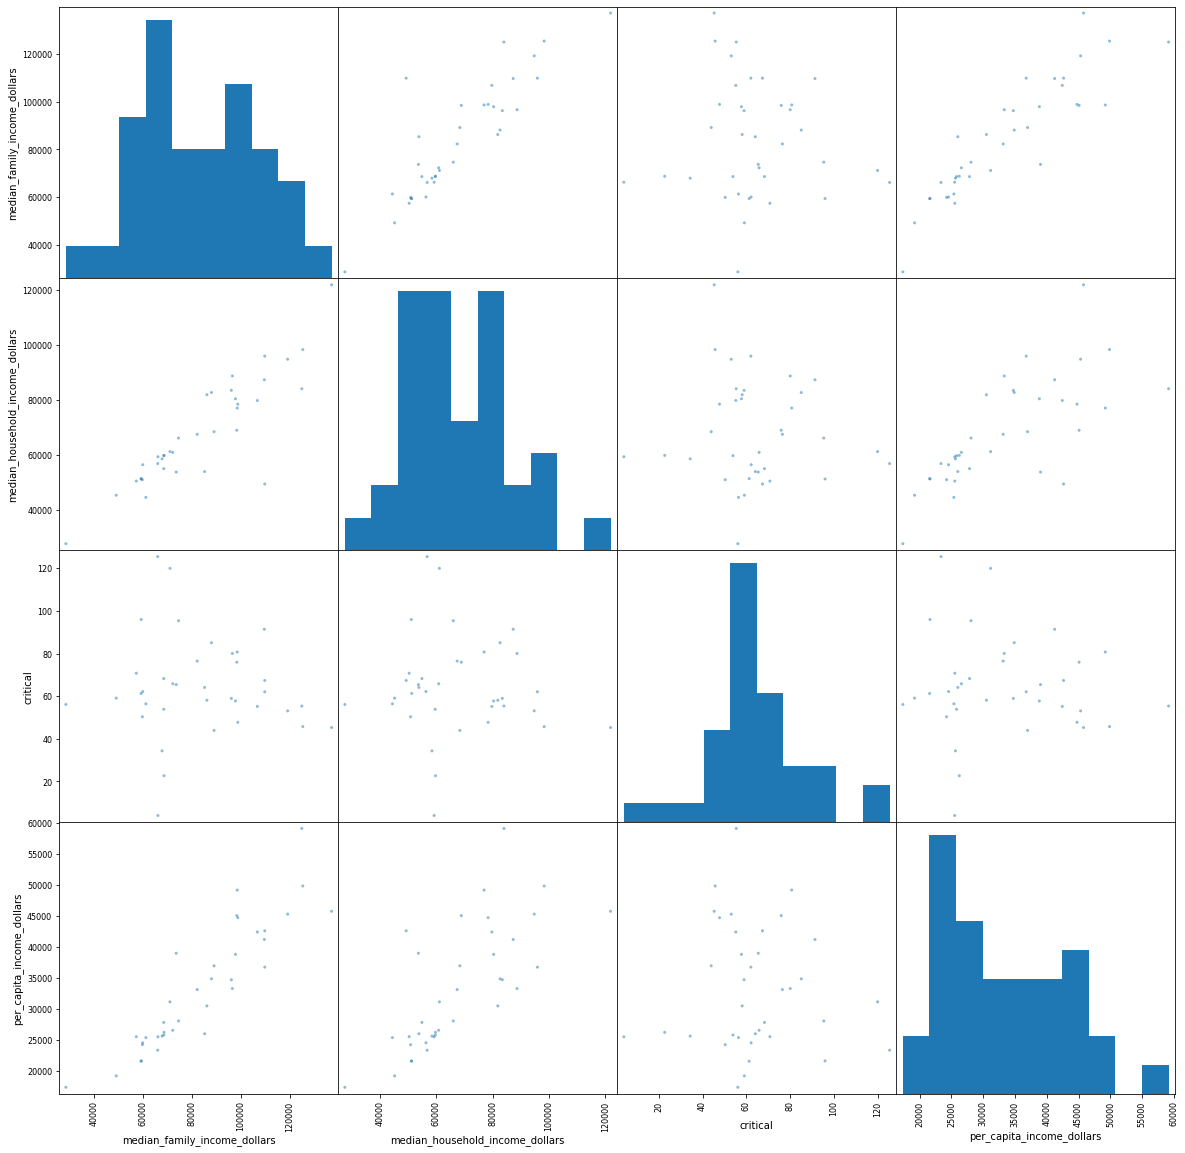

In [13]:
pd.plotting.scatter_matrix(df2[['median_family_income_dollars', 'median_household_income_dollars','critical','per_capita_income_dollars']],figsize=(20,20))
f1 = plt.gcf()

In [14]:
sns.set(font_scale=2.5, style="white")

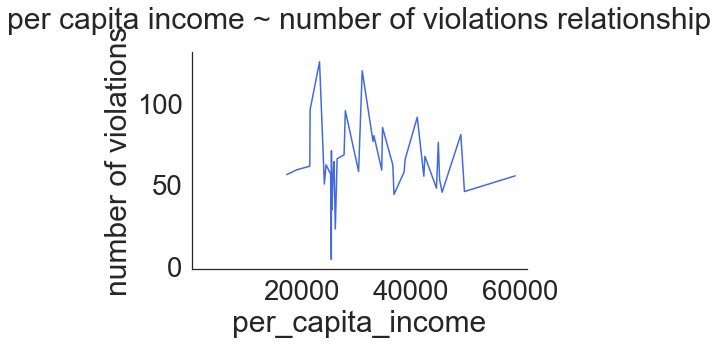

In [15]:
ax = sns.lineplot(x = 'per_capita_income_dollars', y = 'critical',data = df2, color='royalblue')
income = df2['per_capita_income_dollars'].to_list()
x = np.arange(1, len(income)+1)
ax.set_xticks(x, income)

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('per capita income ~ number of violations relationship',y=1.08)
ax.set_ylabel('number of violations')
ax.set_xlabel('per_capita_income');

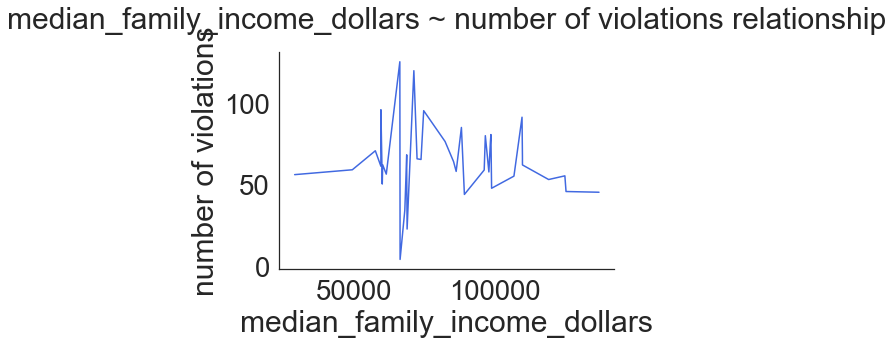

In [16]:
ax = sns.lineplot(x = 'median_family_income_dollars', y = 'critical',data = df2, color='royalblue')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('median_family_income_dollars ~ number of violations relationship',y=1.08)
ax.set_ylabel('number of violations')
ax.set_xlabel('median_family_income_dollars');

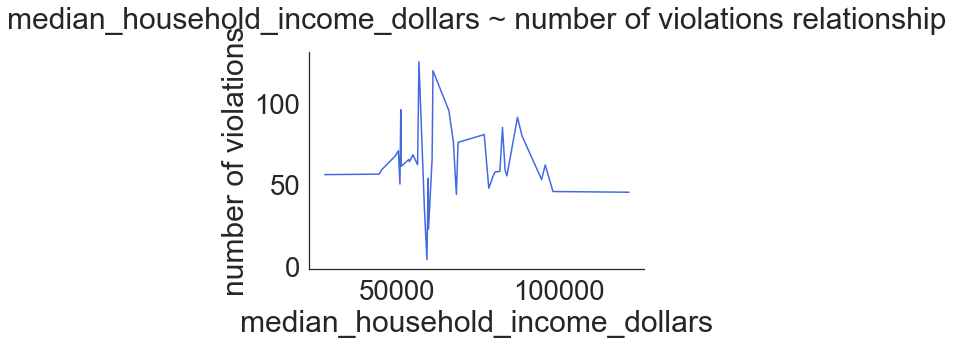

In [17]:
ax = sns.lineplot(x = 'median_household_income_dollars', y = 'critical',data = df2, color='royalblue')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('median_household_income_dollars ~ number of violations relationship',y=1.08)
ax.set_ylabel('number of violations')
ax.set_xlabel('median_household_income_dollars');

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Firstly, I want to analyze the relationships between the four factors about the income level.

In [18]:
#relationship between per_capita_income_dollars and percent_damilies_below_poverty_line
outcome, predictors = patsy.dmatrices('per_capita_income_dollars ~ percent_families_below_poverty_line', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                                OLS Regression Results                               
Dep. Variable:     per_capita_income_dollars   R-squared:                       0.375
Model:                                   OLS   Adj. R-squared:                  0.357
Method:                        Least Squares   F-statistic:                     21.02
Date:                       Thu, 11 Jun 2020   Prob (F-statistic):           5.59e-05
Time:                               03:27:52   Log-Likelihood:                -384.04
No. Observations:                         37   AIC:                             772.1
Df Residuals:                             35   BIC:                             775.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [19]:
#relationship between median_family_income_dollars and median_household_income_dollars
outcome, predictors = patsy.dmatrices('median_family_income_dollars ~ median_household_income_dollars', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                 
Dep. Variable:     median_family_income_dollars   R-squared:                       0.775
Model:                                      OLS   Adj. R-squared:                  0.768
Method:                           Least Squares   F-statistic:                     120.3
Date:                          Thu, 11 Jun 2020   Prob (F-statistic):           7.17e-13
Time:                                  03:27:52   Log-Likelihood:                -397.97
No. Observations:                            37   AIC:                             799.9
Df Residuals:                                35   BIC:                             803.2
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------

In [20]:
#relationship between median_family_income_dollars and per_capita_income_dollars
outcome, predictors = patsy.dmatrices('median_family_income_dollars ~ per_capita_income_dollars', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                 
Dep. Variable:     median_family_income_dollars   R-squared:                       0.813
Model:                                      OLS   Adj. R-squared:                  0.808
Method:                           Least Squares   F-statistic:                     152.3
Date:                          Thu, 11 Jun 2020   Prob (F-statistic):           2.65e-14
Time:                                  03:27:52   Log-Likelihood:                -394.50
No. Observations:                            37   AIC:                             793.0
Df Residuals:                                35   BIC:                             796.2
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [21]:
#relationship between median_household_income_dollars and per_capita_income_dollars
outcome, predictors = patsy.dmatrices('median_household_income_dollars ~ per_capita_income_dollars', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                                   OLS Regression Results                                  
Dep. Variable:     median_household_income_dollars   R-squared:                       0.519
Model:                                         OLS   Adj. R-squared:                  0.506
Method:                              Least Squares   F-statistic:                     37.84
Date:                             Thu, 11 Jun 2020   Prob (F-statistic):           4.88e-07
Time:                                     03:27:52   Log-Likelihood:                -402.91
No. Observations:                               37   AIC:                             809.8
Df Residuals:                                   35   BIC:                             813.0
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                coef    std err          t      P>|t|      [0.02

From the above four linear models, we can know that per_capita_income_dollars and median_family_income_dollars and median_household_income_dollars and percent_damilies_below_poverty_line are strongly related because the P values of the models are 0.000.

Then I want to analyze the relationship between number of violations and each of the four factors about income level.

In [22]:
#relationship between per_capita_income_dollars and number of violations
outcome, predictors = patsy.dmatrices(' critical ~ per_capita_income_dollars', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               critical   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.09553
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.759
Time:                        03:27:52   Log-Likelihood:                -168.30
No. Observations:                  37   AIC:                             340.6
Df Residuals:                      35   BIC:                             343.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The P value is 0.759 so there is no relation between number of violations and per_capita_income.

In [23]:
#relationship between number of violations and percent_damilies_below_poverty_line
outcome, predictors = patsy.dmatrices(' critical ~ percent_families_below_poverty_line', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               critical   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                   0.01657
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.898
Time:                        03:27:52   Log-Likelihood:                -168.34
No. Observations:                  37   AIC:                             340.7
Df Residuals:                      35   BIC:                             343.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

The P value is 0.898 so there is no relation between number of violations and percent_families_below_poverty_line.

In [24]:
#relationship between number of violations and median_family_income_dollars
outcome, predictors = patsy.dmatrices(' critical ~ median_family_income_dollars', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               critical   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.1680
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.684
Time:                        03:27:52   Log-Likelihood:                -168.26
No. Observations:                  37   AIC:                             340.5
Df Residuals:                      35   BIC:                             343.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The P value is 0.684 so there is no relation between number of violations and median_family_income_dollars.

In [25]:
#relationship between number of violations and median_household_income_dollars
outcome, predictors = patsy.dmatrices(' critical ~ median_household_income_dollars ', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               critical   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.1521
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.699
Time:                        03:27:52   Log-Likelihood:                -168.27
No. Observations:                  37   AIC:                             340.5
Df Residuals:                      35   BIC:                             343.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

The P value is 0.699 so there is no relation between number of violations and median_household_income_dollars.

There are no relations between number of violations and each of the four factors. I want to see if any factor has larger influence on number of violations so I will analyze the relationship between number of violations and the combination of the four factors.

In [26]:
#relationship between number of violations and the combination of per_capita_income_dollars and median_family_income_dollars and median_household_income_dollars and percent_damilies_below_poverty_line.
outcome, predictors = patsy.dmatrices(' critical ~ per_capita_income_dollars + median_family_income_dollars + median_household_income_dollars + percent_families_below_poverty_line', df2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               critical   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.117
Method:                 Least Squares   F-statistic:                   0.05858
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.993
Time:                        03:27:53   Log-Likelihood:                -168.22
No. Observations:                  37   AIC:                             346.4
Df Residuals:                      32   BIC:                             354.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Even though all of the four factors are not related to number of violations, percent_families_below_poverty_line has the biggest influence here because it has the largest coefficient and the smallest P value.

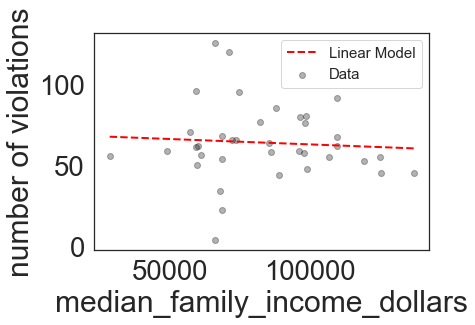

In [27]:
#plot the relationship between median_family_income_dollars and number of violations
plt.scatter(x = 'median_family_income_dollars', y = 'critical',data = df2,color='black',alpha=0.3,label='Data')
x1 = np.arange(df2['median_family_income_dollars'].min(),df2['median_family_income_dollars'].max()+1)
ys =  -6.62e-05* x1 +  69.6469
plt.plot(x1, ys, '--k', linewidth=2, label='Linear Model', color='red')
plt.ylabel('number of violations')
plt.xlabel('median_family_income_dollars')
plt.legend(prop={'size': 15})

# Ethics & Privacy

1. The question
My question is that is there any relation between the income level of an area and the average number of violations reported in restaurants in the area. I believe it is well_posed. I did many background search and based on my research i believe that there is some relation between the income level and number of violations. My question involves restaurants and households in several areas in United States.

2. The implications
The restaurants are the stakeholders and people may think that restaurants in particular areas usually have more violations in health inspection. The names of the restaurants will not show on the final model and other people will not know about the violations in any restaurant.

3. The data
There is data available and directly related to my question. I get the data from my professor so the data can be trusted, and they are public and being allowed to use for my project. The zipcodes data only includes information in 38 zipcodes so the amount of data may be not enough. Also the zipcodes are generally close to each other so there may be some bias. The restaurants collected may not include all restaurants in a particular area so there may be bias about the average number of violations in an area, since violations in some restaurants may not be included.

4. Informed consent
The data I use in this project is from my professor so the restaurants information and zip information should be allower to use. I believe that the owners of the data should agree to participate in this project.

5. Privacy
I can guanrantee privacy because my datasets do not include any personal information. The data does not have any risk about privacy and I removed all personally identifiable information in the dataset.

6. Evaluation
I will evaluate the project by measuring the change of number of violations reported.

7. Analysis
I have analyzed the relation between the number of violations and each of other four factors about the income level, and the relation between the number of violations and the combination of the other four factors. I also analyzed the relation between the four factors. Therefor, my analysis covers many perspectives and I considered many factors that may influence my analysis. But there can still be some missing perspectives in the analysis. There may be some factors which influences the number of violations in these zipcode areas. The number of restaurants collected in each zipcode area may be different, so I calculate the mean of number of violations in each restaurant in an area. The data visualization and summary statistics honestly represent the data. The data with PII are not used unless necessary for the analysis. 

8. Transparency and appeal
No, my model is not a black box. Every decision is interpretable.

9. Continuous monitoring
I will always check if anyone is harmed by this project and if there is someone i will change the project. I will keep tracking the change of influence of income level on restaurants and accomodate the coefficients of different factors about income level to get the most accurate result.

# Conclusion & Discussion

    My project wants to analyze the relationship between the income level of an area and the number of violations reported in that area. I use three datasets including the restaurants dataset, zipcodes dataset and violations dataset. I combine the three datasets to calculate the average of the sum of violations in each restaurant in a zipcode area. My result does not suppose my hypothesis. My analysis and data visualization shows that there is generally no relation between income level and number of violations. The P values I get from the linear models I generated are all bigger than 0.01, so there are no relationships. Therefore, I conclude that, based on my dataset, income level does not influence the number of violations.
    During my analysis process, I firstly analyze if the four factors about the income level in an area are correlated, and since the P values of the linear models I generated is 0.000, I conclude that there relationships between them. Then I want to see if there is a relationship between number of violations and each of the four income properties. So I generated four linear models, but the P values are all above 0.01 so there are no relationships between number of violations and the income properties. Then I want to analyze which of the four factors has a larger influence on number of violations and I generate a linear model between number of violations and the combination of the four income properties. I find that percent_families_below_poverty_line has largest influence on the number of violations.
    There are some limitations of my project. Firstly, the dataset I use is not big enough for my analysis. I want to analyze in the unit of zipcode but the zipcodes dataset only has 38 zipcodes. so the number of obeservations in the final dataframe is too small so there might be a bias. The zipcodes are relatively close to each other, so there may be some bias because close area may be similar to some extent. The restaurants dataset may not include all restaurants in the zipcode areas I analyze, so there may be some bias because the violations in some restaurants are not taken into account in my analysis. Secondly, when I analyze the influence of income level on violations in restaurants, there may be some factors not included in the dataset that can has effects, such as the price level in that city, which may make the income level hard to be compared.
    Considering the impact of my project on the society, I would say it can have big impacts if I can support my hypothesis. If we can conclude a relationship between income level and violations in restaurants, we can apply different policies in areas with different income levels to make health inspection more efficient. Health inspection is always very important to citizens. The increase in efficiency of health inspection can increase the accuracy of health inspection and prevent more violations in restaurants. As a result, there will be less illness resulted from unhealthy food in restaurants. If citizens can be healthier, there will be less health costs and social costs. Therefore, my project can have big impacts in the society by ensuring citizens' health, restaurants' cleanness, and reducing social costs resulted from unhealthy food in restaurants.